## ライブラリ再読み込み ##
+ ライブラリを修正したときにこのノートを実行後、ライブラリのインポートから再実行すると、修正後のライブラリが実行される。

In [ ]:
import importlib
import fastf1lib
importlib.reload(fastf1lib)

## 初期化 ##
ライブラリをローカルパスから読み込むため、ライブラリのあるディレクトリをパスに追加してから読み込む。

In [1]:
import sys
import importlib
sys.path.append("fastf1_libs")
from fastf1_lib import myFastf1

ff1 = myFastf1()

## セッション読み込み ##
指定したセッションを読み込み、オブジェクトを返す。

#### Parameters ####
1. name : string - グランプリ名(国名やサーキット名等、特定できる文字であれば fastf1 側で処理してくれる)
1. year : int - 開催年
1. s : string - セッション(後述)
1. cache : string - キャッシュパス

セッションは以下の文字列を使用するか、数字 (FP1 が 1、FP2 が 2、レースは 5 など) で指定する。
+ Race: 'R'
+ Qualify: 'Q'
+ Sprint：'S'
+ Sprint Shootout： 'SQ'
+ FP1～3: 'FP1', 'FP2', 'FP3'

キャッシュパスは、フォルダが存在しないとエラーになる。
また、相対パスで記述する場合は、ライブラリではなく、呼び出す側のファイルとの相対パスで指定すること。

#### Returns ####
セッションオブジェクト
(後続の処理で使用する)

In [2]:
session_race = ff1.load_session_o(
    name="mexico", 
    year=2023, 
    s='R',
    cache='/work/fastf1-libs/cache/'
    )
session_qual = ff1.load_session_o(
    name="mexico", 
    year=2023, 
    s='Q',
    cache='/work/fastf1-libs/cache/'
    )


core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.3.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/19/results.json failed; using cached response
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/requests_cache/session.py", line 290, in _resend
    response.raise_for_status()
  File "/usr/local/lib/python3.10/dist-packages/requests/models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2023/19/results.json
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached da

## コーナーの速度差を計算 ##
#### Parameters ####
1. session : session - セッションオブジェクト
1. driver1 : string - ドライバー名(3文字略称)
1. driver2 : string - ドライバー名(3文字略称)
1. min_dist : int - 表示開始の距離
1. max_dist : int - 表示終了の距離

#### コーナーの距離を表示する方法 ####
circuit_info = session_qual.get_circuit_info()  
circuit_info.corners

In [12]:
circuit_info = session_qual.get_circuit_info()
circuit_info.corners

,X,Y,Number,Letter,Angle,Distance
0,11549.390625,-620.416504,1,,26.961071,1198.506810
1,11579.570557,-1334.711426,2,,-161.456631,1269.579602
2,11984.500977,-1769.020264,3,,26.924667,1328.015427
3,8811.018692,-7835.065430,4,,-166.079314,2027.726312
4,9258.899475,-8332.687500,5,,-0.292552,2098.948243
5,8180.223450,-9021.795898,6,,-109.046015,2236.782611
6,8337.142670,-5797.260254,7,,25.060337,2567.265893
7,7521.641602,-5024.284180,8,,-141.619777,2676.169383
8,7078.690796,-4423.575684,9,,50.280962,2750.298778
9,5329.669922,-3929.691406,10,,-128.913482,2944.903880


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


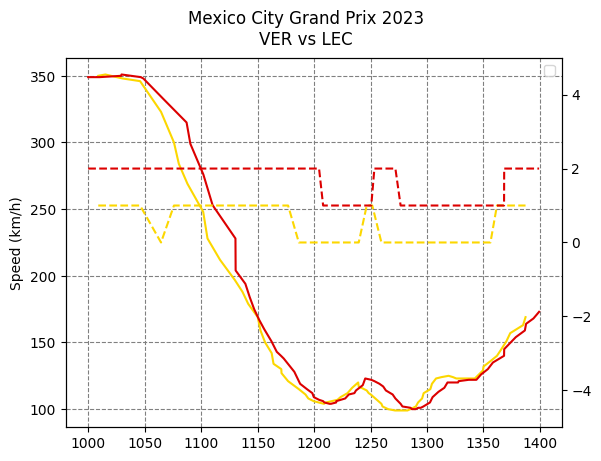

In [3]:
ff1.cornerspeed_compare(
    session=session_qual,
    driver1='VER',
    driver2='LEC',
    min_dist=1000,
    max_dist=1400
)

## 2ドライバーのテレメトリーデータ比較 ##
ドライバーの指定は、3文字省略形、またはカーナンバー

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver1 : string
    ドライバー1
1. driver2 : string
    ドライバー2

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


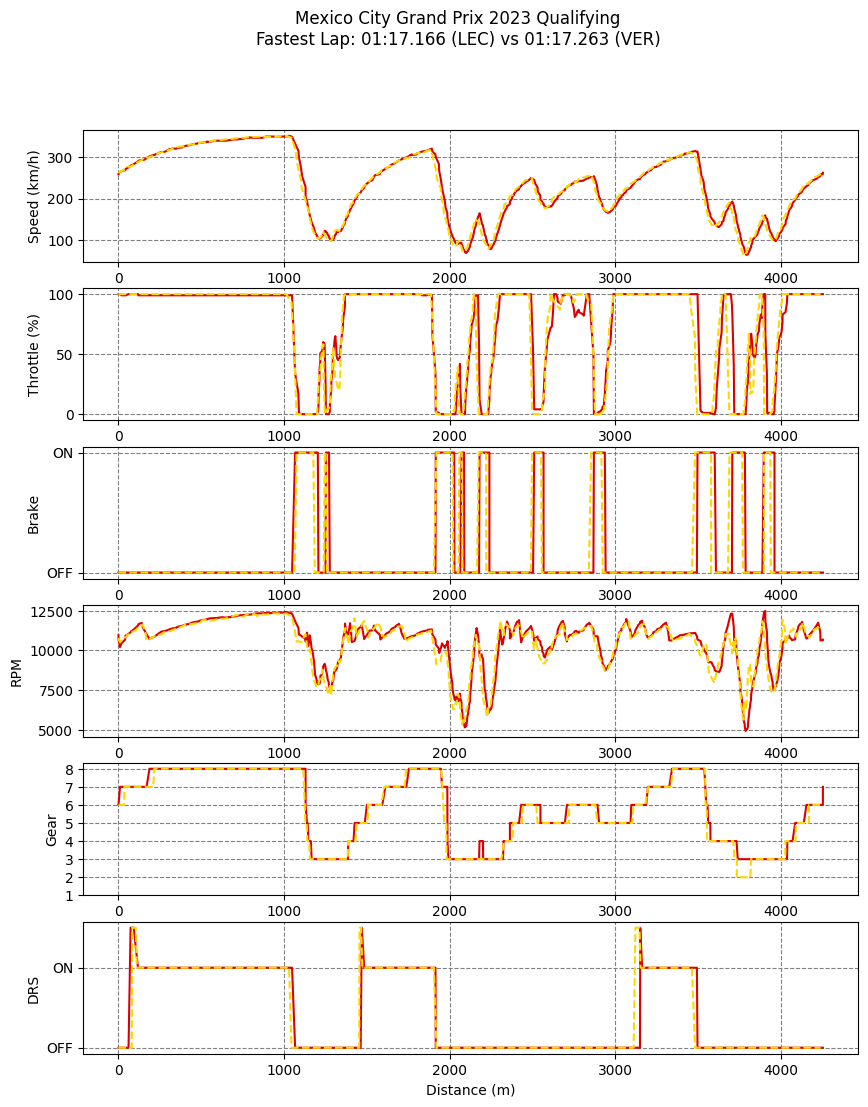

In [4]:
ff1.datachart_compare(
    session=session_qual,
    driver1='LEC',
    driver2='VER'
    )

## 複数ドライバーのラップタイム推移を比較 ##
ドライバーリストは、[] で囲んで , で区切って記載する。  
ドライバーリストの最初に指定したドライバーを基準タイム(0の線)として表示する。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. drivers : [string]
    ドライバーのリスト

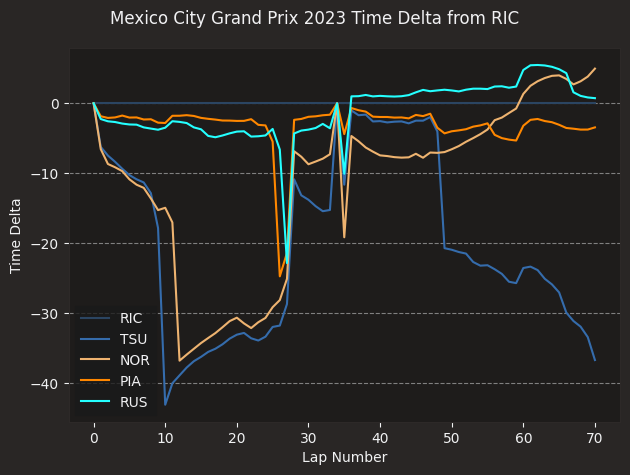

In [5]:
ff1.deltatime_comperition(
    session=session_race,
    drivers=['3', '22', '4', '81', '63']
    )

## ドライバーのラップタイム一覧 ##
タイヤコンパウントで色分けしてラップタイムをプロットする。  

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver : string
    ドライバー名を3文字略称で指定

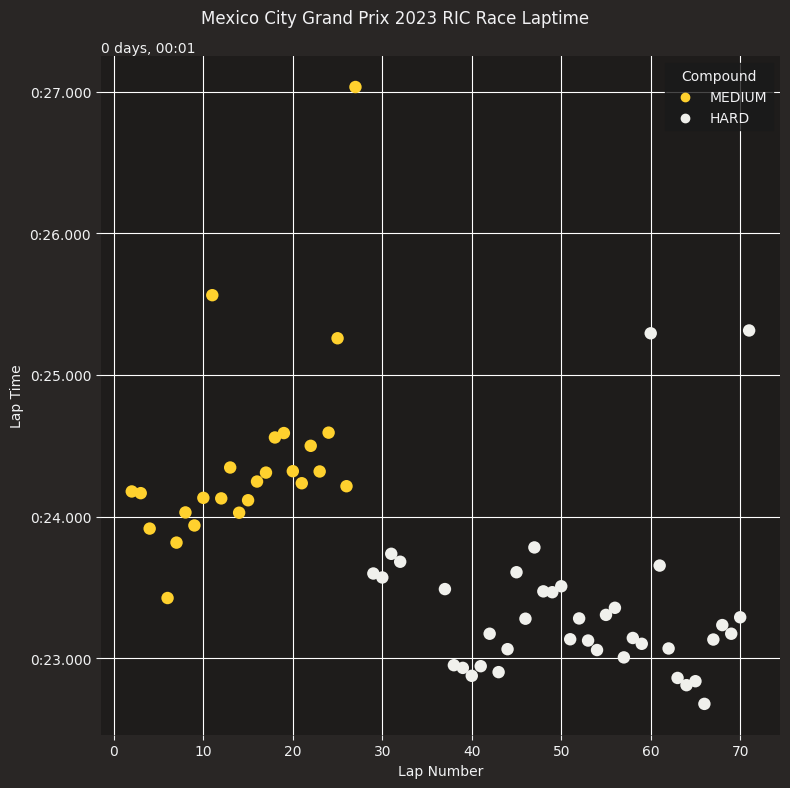

In [5]:
ff1.driver_laptime(
    session=session_race,
    driver='RIC'
    )

## 平均タイムとのタイム差 ##
ドライバーリストは [] で囲んで , で区切って記載する。  
ドライバーリストの先頭の平均ラップタイムを 0 とする。  
セーフティーカー先導等、遅いラップを挟むと平均値が上手く計算できない。赤旗中断を挟むと意図したグラフにならない。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. drivers : [string]
    プロットするドライバーをリスト形式で指定
1. min_sec : int
    y 軸の上端値
1. max_sec : int
    y 軸の下端値
1. lap_num : int
    描写を開始する周回数。初期値:0

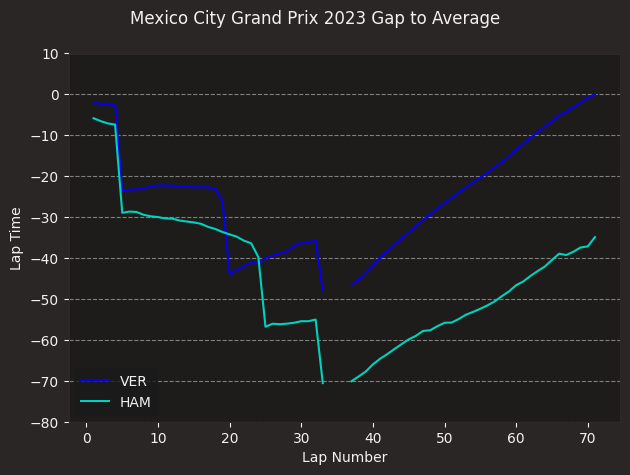

In [7]:
ff1.gap_to_average(
    session=session_race,
    drivers=[1, 44],
    min_sec=10,
    max_sec=-80,
    lap_num=0
    )

## 各ドライバーのラップタイム推移 ##
ドライバーリストは [] で囲んで , で区切って記載する。  

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. drivers : [string]
    プロットするドライバーをリスト形式で指定
1. min_sec : int
    y 軸の上端値(秒数で指定)
1. max_sec : int
    y 軸の下端値(秒数で指定)

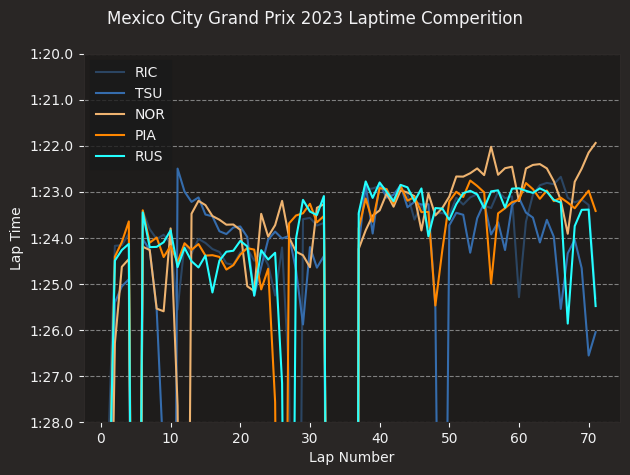

In [5]:
ff1.laptime_comperition(
    session=session_race,
    drivers=['3', '22', '4', '81', '63'],
    min_sec=80,
    max_sec=88
    )

## 各ドライバーのラップタイム推移(一部のラップのみ) ##
ソフトタイヤのラップのみをグラフ化する場合など、別途フィルターしたラップでグラフ化したい場合に使用する。
ドライバーリストは [] で囲んで , で区切って記載する。  

#### Parameters ####
----------
1. event : session.event 
    セッションのeventオブジェクト
1. laps : session.laps 
    セッションのlapsオブジェクト。セッション全体をグラフ化する場合は session.laps で指定する。
    一部のラップのみをグラフ化する場合は、先に条件でラップをフィルターしてから指定する。
1. drivers : [string]
    プロットするドライバーをリスト形式で指定
1. min_sec : int
    y 軸の上端値(秒数で指定)
1. max_sec : int
    y 軸の下端値(秒数で指定)

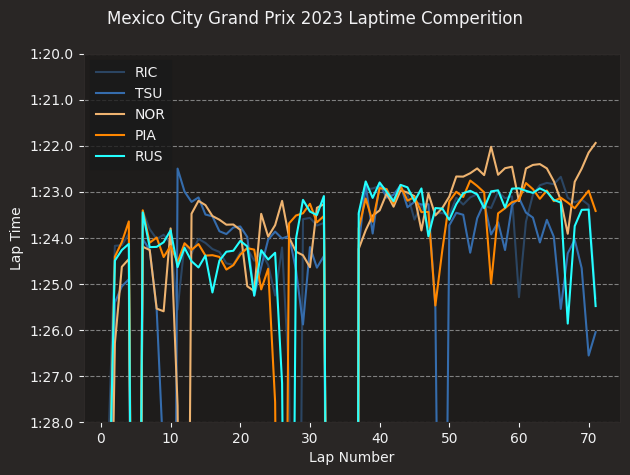

In [6]:
ff1.laptime_comperition_sep(
    event=session_race.event,
    laps=session_race.laps,
    drivers=['3', '22', '4', '81', '63'],
    min_sec=80,
    max_sec=88
    )

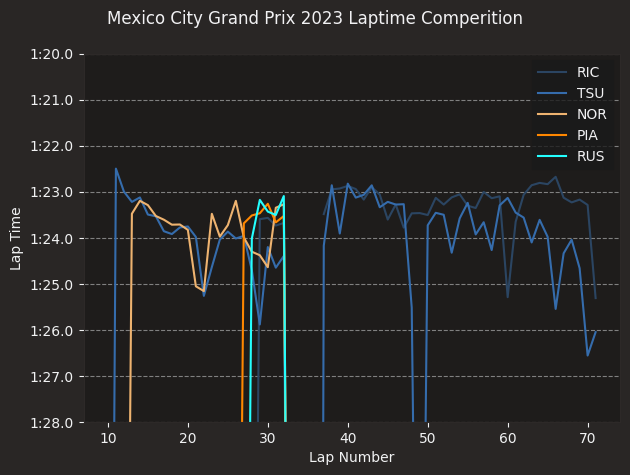

In [11]:
# 例えば、ハードタイヤのラップのみをグラフ化する場合は以下の通り。
# レースよりも、フリー走行のデータの方を想定している。

laps = session_race.laps.loc[session_race.laps['Compound'] == "HARD"]

ff1.laptime_comperition_sep(
    event=session_race.event,
    laps=laps,
    drivers=['3', '22', '4', '81', '63'],
    min_sec=80,
    max_sec=88
    )

## 各ドライバーのラップタイムの出現範囲をプロット ##
上位10名について表示する。  

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

/work/fastf1-libs/fastf1_lib/fastf1lib.py:321: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=driver_laps,
/work/fastf1-libs/fastf1_lib/fastf1lib.py:321: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(data=driver_laps,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWar

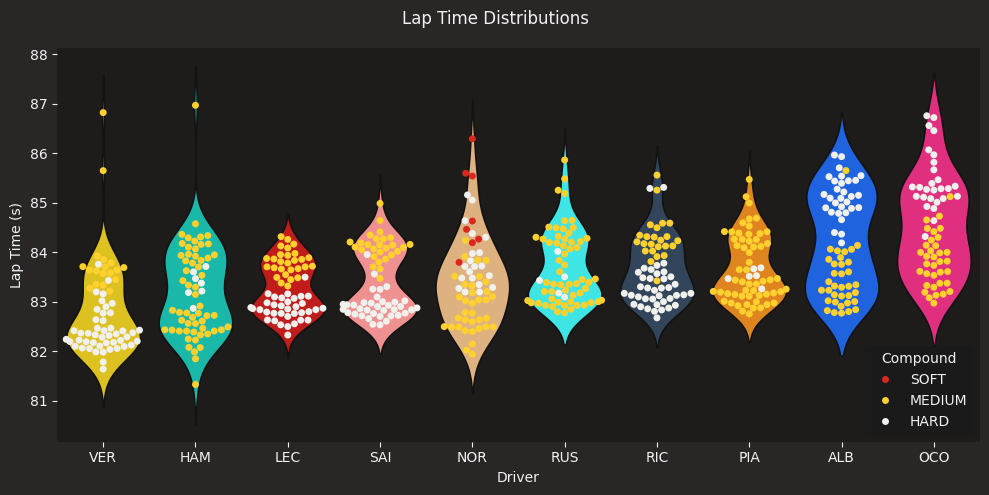

In [5]:
ff1.laptime_distribution(
    session=session_race
    )

## ミニセクターごとにドライバー比較 ##
ミニセクター区切りは、最初に 0 を入れること。  
最後はラップ終わりにする必要はない。最後に指定した値から、ラップ最後までが最後のミニセクターになる。  
等間隔で区切った値を使う場合は、以下のコードを参考に計算して引数で渡すことが可能。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver1 : string
    ドライバー1。
1. driver2 : string
    ドライバー2。
1. minisectors : [int]
    ミニセクターの距離をリストで指定。

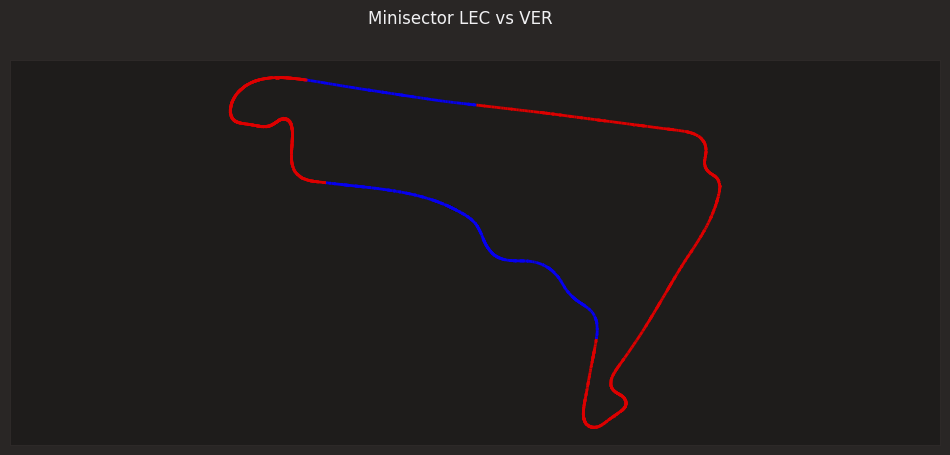

In [21]:
# 等分でミニセクターを区切る場合
laps = session_qual.laps.pick_driver('LEC').pick_fastest()
laps_tel = laps.get_telemetry().add_distance()
max(laps_tel['Distance'])

num_minisectors = 25

total_distance = max(laps_tel['Distance'])

minisector_length = total_distance / num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

minisectors

# 手動で指定する場合
minisectors = [0,1000,2000,3000,4000]

ff1.minisector_compare(
    session=session_qual,
    driver1='LEC',
    driver2='VER',
    minisectors=minisectors
    )

## セッション中のポジション推移 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

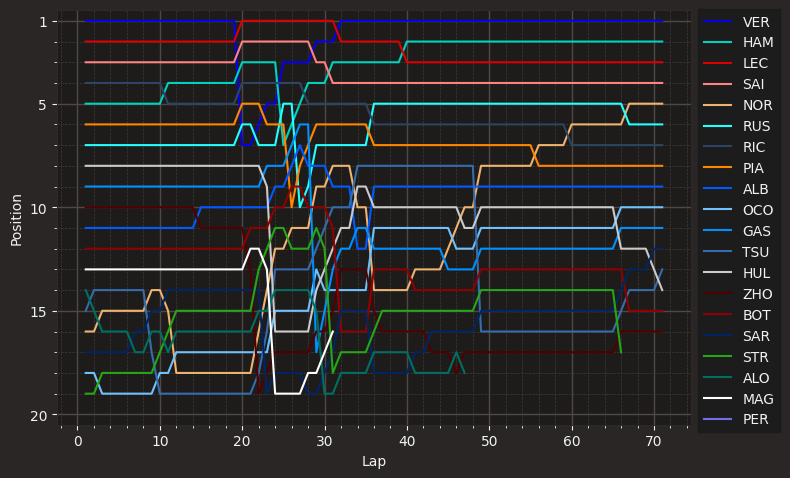

In [22]:
ff1.position_changes(
    session=session_race
    )

## 予選のパフォーマンス差 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

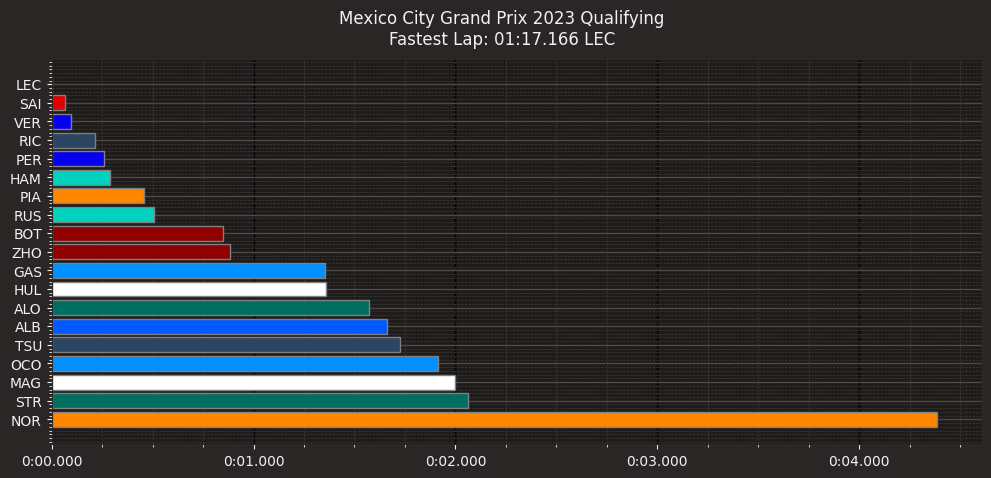

In [23]:
ff1.quali_result(
    session=session_qual
    )

## スリック vs レインの色付け ##
セッション中に雨が降った時に、ミニセクターごとにスリックタイヤとレインタイヤで早いほうを色付けする。

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. target_lap : int
    比較する周回

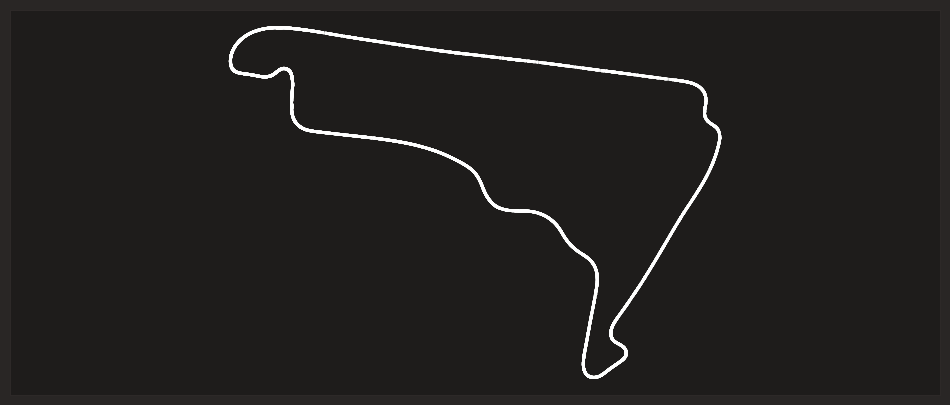

In [24]:
ff1.slick_vs_wet(
    session=session_race,
    target_lap=51
    )

## 2ドライバーの速度比較 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. driver1 : string
    ドライバー1
1. driver2 : string
    ドライバー2

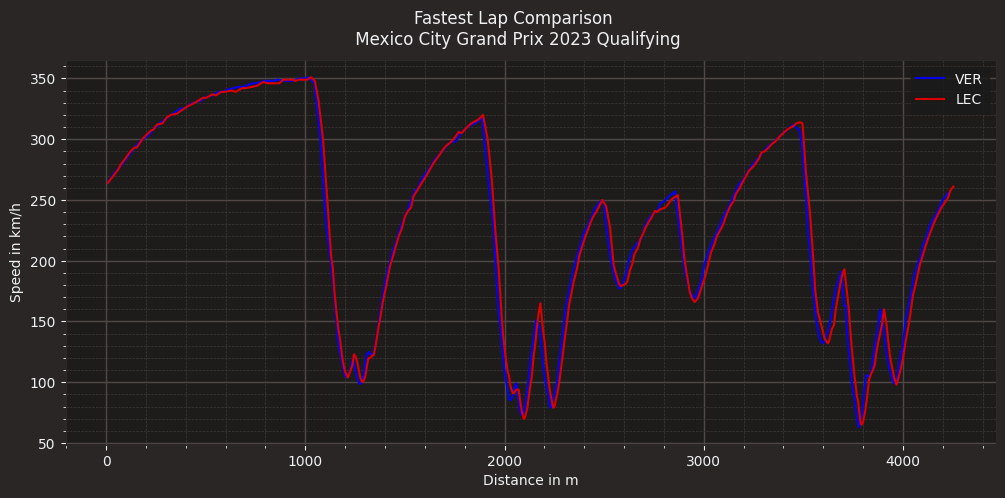

In [29]:
ff1.speed_compare(
    session=session_qual,
    driver1='VER',
    driver2='LEC'
    )

## 1 ラップの速度をグラフ化(コーナー位置あり) ##
#### Parameters ####
1. session : session - セッションオブジェクト

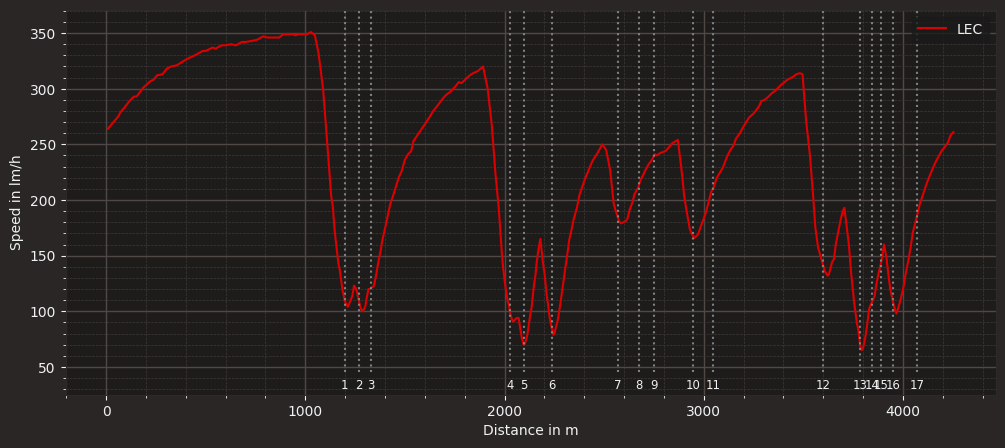

In [22]:
ff1.speed_traces(
    session=session_qual
    )

## 最高速度のヒートマップ ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. datanum : int
    データ個数
1. vmin : int
    最小速度

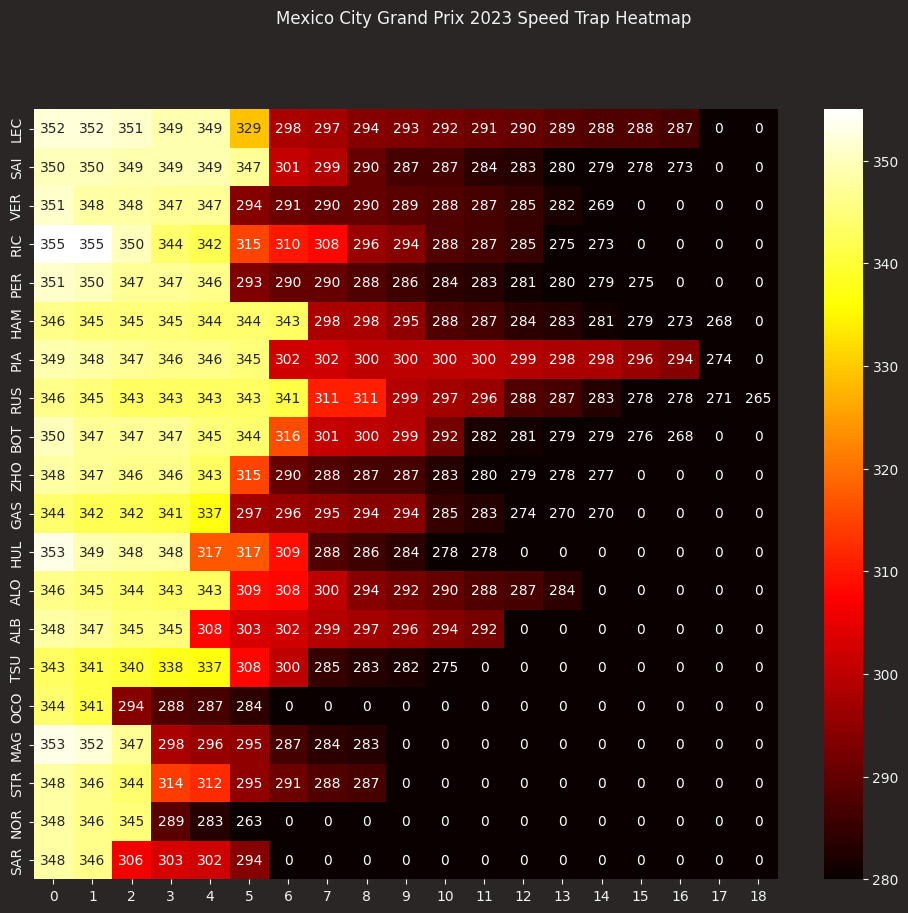

In [6]:
ff1.speedtrap_heatmap(
    session=session_qual,
    datanum=20,
    vmin=280
    )

## チームごとのパフォーマンス差 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト

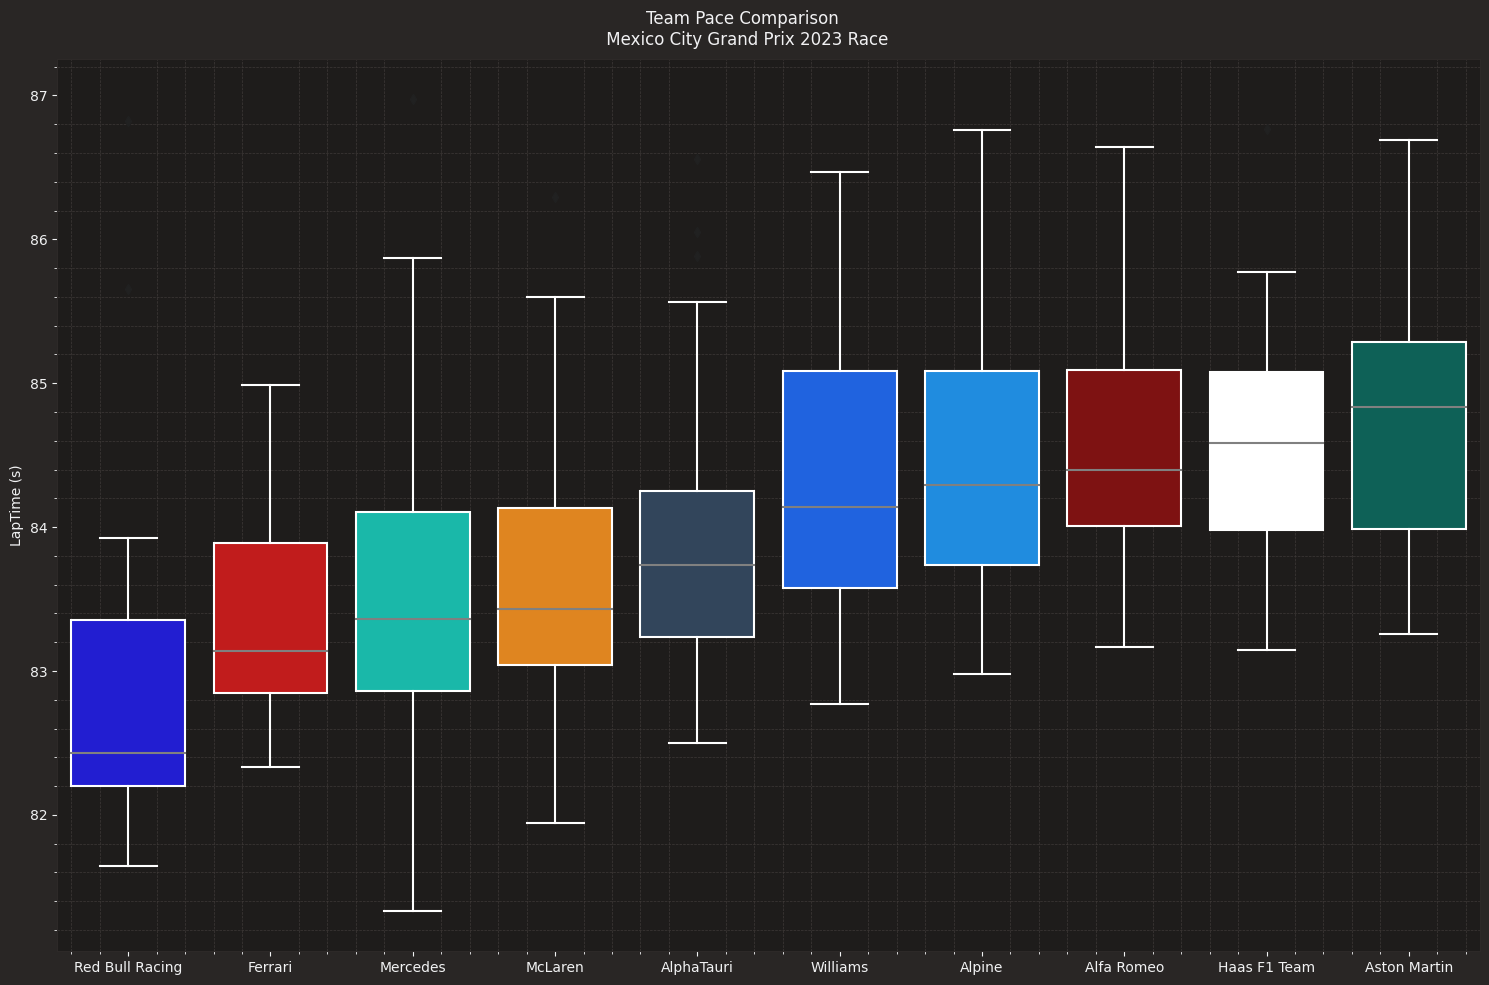

In [31]:
ff1.team_comparison(
    session=session_race
    )

## タイヤ使用履歴 ##

#### Parameters ####
----------
1. session : session 
    セッションオブジェクト
1. drivers : list
    一覧表示するドライバーのリスト。全員を指定する場合は session_race.drivers を渡す

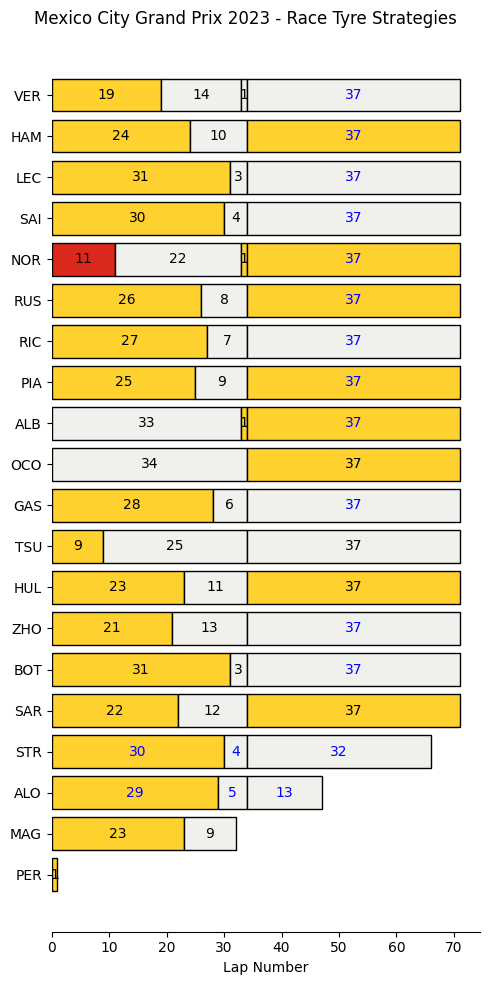

In [3]:
ff1.tyre_strategies(
    session=session_race,
    drivers=session_race.drivers
    )